In [ ]:
def add_count(plot):
    '''adds counts to bar and count plots'''
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

def value_counts_perc(df, column):
    value_counts = df[column].value_counts()
    
    perc = []
    for i in value_counts:
        perc.append(str(round(i/sum(value_counts)*100,2)))
    
    return perc

def make_crosstab(df, col):
    crosstab = pd.crosstab(df[col],[df["churn"]])
    crosstab.reset_index(level=0, inplace=True)
    crosstab["False_per"]= crosstab[False].div(crosstab[False]+crosstab[True]).multiply(100)
    crosstab["True_per"]= crosstab[True].div(crosstab[False]+crosstab[True]).multiply(100)
    crosstab.drop([False, True], axis=1, inplace=True) 
    return crosstab

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline
#sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')

In [3]:
df = pd.read_csv("00_data/data_cleaned.csv", index_col=0)

/Users/sebastianrotten/opt/anaconda3/envs/capstone-ZEIT-2020-ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(155594, 170)

In [5]:
df.kuendigungs_eingangs_datum.fillna(value='2020-05-26', inplace=True)

In [6]:
df['liefer_beginn_evt']= pd.to_datetime(df['liefer_beginn_evt'])

In [7]:
df['kuendigungs_eingangs_datum']= pd.to_datetime(df['kuendigungs_eingangs_datum'])

In [8]:
df.head(1)

,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,...,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x,abo_registrierung_min_YEAR
128650,2018-09-05,Telefonmarketing,ZEIT Digital,Festabo,jährlich,11,0,Bankeinzug,0,xx,...,0.0,0.2,0.0,0.08,0.0,1,2019-08-23,1,2019-08-23 00:00:00,1900


In [9]:
#df["abo_kuendigun_YEAR"] = df["abo_registrierung_min"].apply(lambda x: x.split()[0].split("-")[0])
#df = df.sort_values(by=['abo_registrierung_min_YEAR'])

In [10]:
df_timeseries = df[['churn','avg_churn', 'date_x', 'kuendigungs_eingangs_datum', 'liefer_beginn_evt','abo_registrierung_min', 'nl_registrierung_min',
                    'lesedauer', 'rechnungsmonat', 'kanal', 'plz_3', 'objekt_name', 'aboform_name', 'zahlung_rhythmus_name']]

In [11]:
df_timeseries['tage'] = (df_timeseries['kuendigungs_eingangs_datum'] - df_timeseries['liefer_beginn_evt']).dt.days

<ipython-input-11-e515d825ba6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['tage'] = (df_timeseries['kuendigungs_eingangs_datum'] - df_timeseries['liefer_beginn_evt']).dt.days


In [12]:
df_timeseries['monate'] = ((df_timeseries['kuendigungs_eingangs_datum'] - df_timeseries['liefer_beginn_evt'])/np.timedelta64(1, 'M'))

<ipython-input-12-91ad459cab23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['monate'] = ((df_timeseries['kuendigungs_eingangs_datum'] - df_timeseries['liefer_beginn_evt'])/np.timedelta64(1, 'M'))


In [13]:
df_timeseries.head()

,churn,avg_churn,date_x,kuendigungs_eingangs_datum,liefer_beginn_evt,abo_registrierung_min,nl_registrierung_min,lesedauer,rechnungsmonat,kanal,plz_3,objekt_name,aboform_name,zahlung_rhythmus_name,tage,monate
128650,1,0.610627,2019-08-23 00:00:00,2019-08-23,2018-09-05,1900-01-01 00:00:00,2016-07-07 16:05:56,11,0,Telefonmarketing,xx,ZEIT Digital,Festabo,jährlich,352,11.564919
124934,1,0.264285,2019-10-14 00:00:00,2019-10-14,2018-02-15,1900-01-01 00:00:00,2017-07-12 20:08:26,20,0,Eigenwerbung,xx,DIE ZEIT,Geschenkabo,jährlich,606,19.910060
124942,1,0.407360,2020-01-09 00:00:00,2020-01-09,2018-12-02,1900-01-01 00:00:00,2015-01-07 09:13:46,13,0,Telefonmarketing,xx,ZEIT Digital,Festabo,jährlich,403,13.240518
27470,0,0.309526,2019-11-08 00:00:00,2020-05-26,2013-08-08,1900-01-01 00:00:00,1900-01-01 00:00:00,75,0,Telefonmarketing,xx,DIE ZEIT,Festabo,halbjährlich,2483,81.578677
124951,1,0.371599,2020-03-31 00:00:00,2020-03-31,2019-01-03,1900-01-01 00:00:00,1900-01-01 00:00:00,14,0,Fremdwerbung,xx,DIE ZEIT,Negative Option,jährlich,453,14.883262


In [14]:
df_timeseries['diffmonth'] = (df_timeseries['lesedauer']-df_timeseries['monate']).round()

<ipython-input-14-6880c311815b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['diffmonth'] = (df_timeseries['lesedauer']-df_timeseries['monate']).round()


In [15]:
df_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155594 entries, 128650 to 198476
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   churn                       155594 non-null  int64         
 1   avg_churn                   155594 non-null  float64       
 2   date_x                      155594 non-null  object        
 3   kuendigungs_eingangs_datum  155594 non-null  datetime64[ns]
 4   liefer_beginn_evt           155594 non-null  datetime64[ns]
 5   abo_registrierung_min       155594 non-null  object        
 6   nl_registrierung_min        155594 non-null  object        
 7   lesedauer                   155594 non-null  int64         
 8   rechnungsmonat              155594 non-null  int64         
 9   kanal                       155594 non-null  object        
 10  plz_3                       155594 non-null  object        
 11  objekt_name                 155594

## Plotting some interesting features against time:

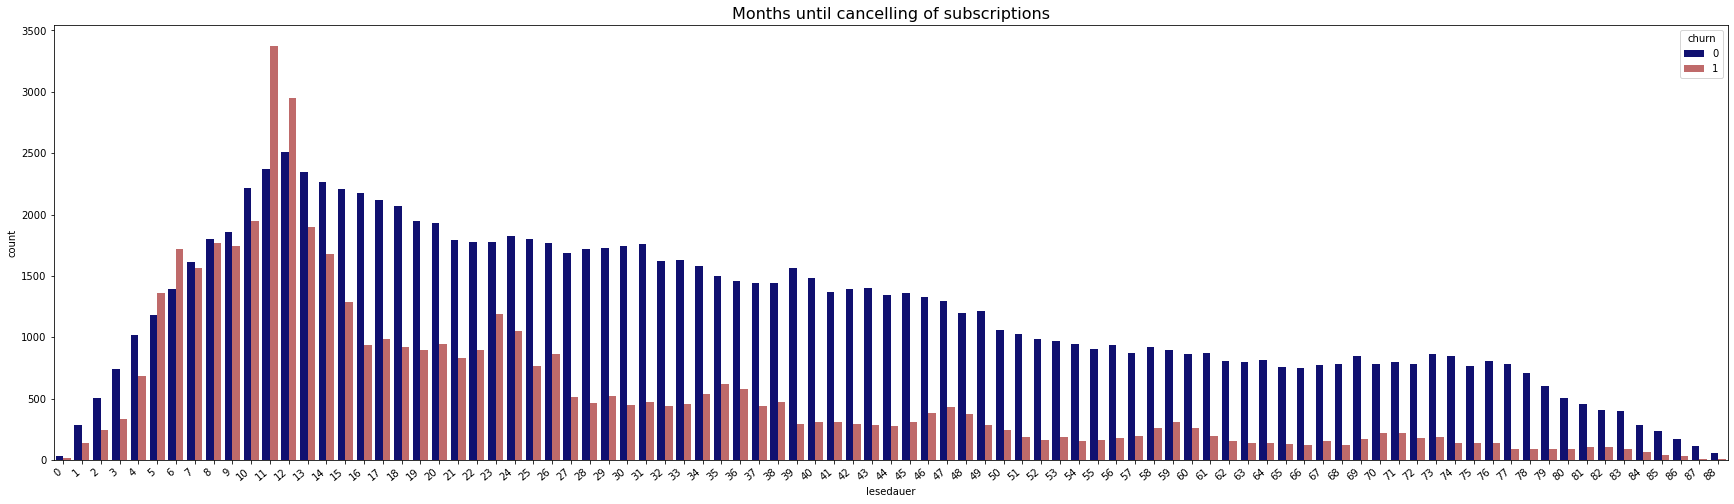

In [16]:
plt.figure(figsize=(30,8))
custom_palette_2 = ["navy", "indianred"]
f = sns.countplot(x=df.lesedauer, data=df, hue="churn", palette=custom_palette_2);
f.set_title("Months until cancelling of subscriptions", fontsize=16);
f.set_xticklabels(f.get_xticklabels(), rotation=40, ha="right");

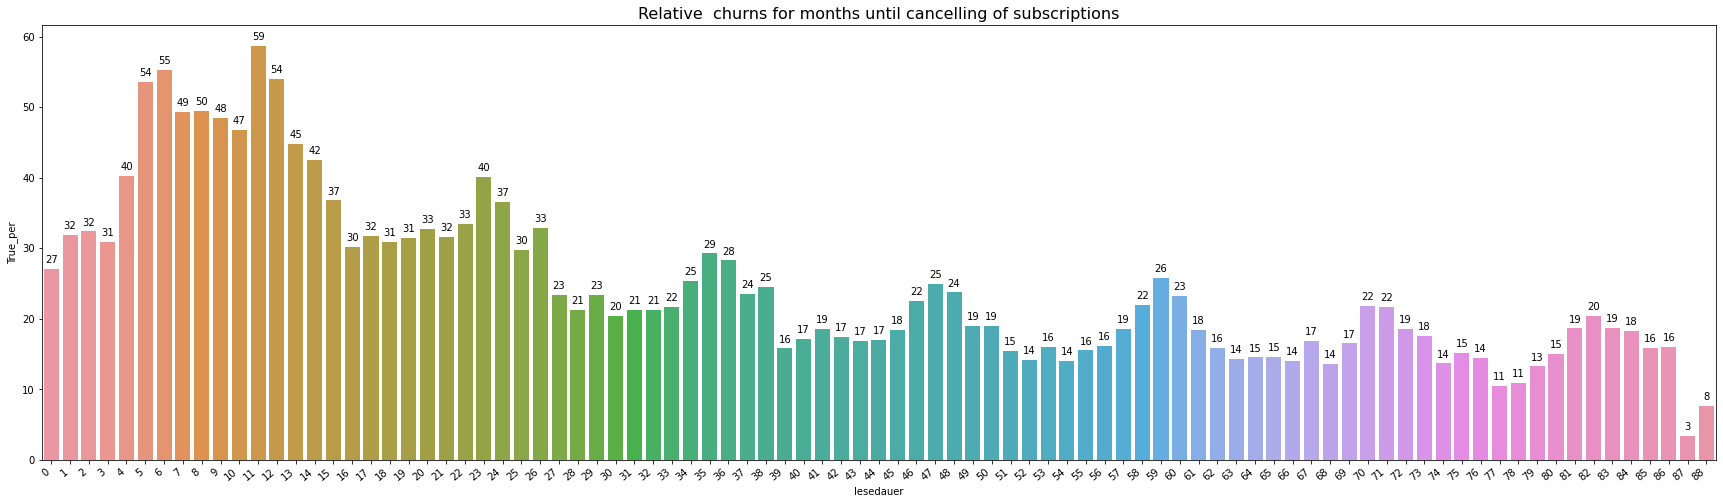

In [17]:
crosstab_lesedauer = make_crosstab(df, "lesedauer")  

plt.figure(figsize=(30,8))
f3 = sns.barplot(data=crosstab_lesedauer, x="lesedauer", y="True_per")
f3.set_title("Relative  churns for months until cancelling of subscriptions", fontsize=16);
f3.set_xticklabels(f3.get_xticklabels(),rotation=40, ha="right");
add_count(f3)

### Lesedauer:
- this variable is the difference between "liefer_beginn_evt" and "kündigungs_eingangs_datum" if the subscriber is churning.
- if the subscriber is not churning, the "lesedauer" is the difference between "liefer_beginn_evt" and "date_x", where the fictional day x is:
    - 2020-05-26 for  

In [18]:
df_timeseries.query("churn == 0").sort_values("date_x", ascending=False)

,churn,avg_churn,date_x,kuendigungs_eingangs_datum,liefer_beginn_evt,abo_registrierung_min,nl_registrierung_min,lesedauer,rechnungsmonat,kanal,plz_3,objekt_name,aboform_name,zahlung_rhythmus_name,tage,monate,diffmonth
136021,0,0.371599,2020-05-26 00:00:00,2020-05-26,2019-03-14,2018-12-02 03:37:00,2017-04-02 17:13:02,14,0,andere,850,DIE ZEIT,Probeabo,jährlich,439,14.423294,-0.0
129233,0,0.309744,2020-05-26 00:00:00,2020-05-26,2018-07-04,2012-02-16 14:51:24,2008-03-15 09:44:23,22,0,andere,353,ZEIT Digital,Negative Option,jährlich,692,22.735580,-1.0
187958,0,0.540978,2020-05-26 00:00:00,2020-05-26,2019-05-09,1900-01-01 00:00:00,2019-11-09 13:27:52,12,1,Eigenwerbung,xx,DIE ZEIT,Probeabo,jährlich,383,12.583421,-1.0
158666,0,0.212320,2020-05-26 00:00:00,2020-05-26,2018-12-03,2018-03-11 03:39:04,2018-03-11 03:39:04,17,0,Eigenwerbung,652,DIE ZEIT,Festabo,jährlich,540,17.741637,-1.0
75827,0,0.242620,2020-05-26 00:00:00,2020-05-26,2017-07-27,2012-11-08 10:49:44,2013-11-20 00:00:00,34,0,Mailings,594,ZEIT Digital,Probeabo,jährlich,1034,33.971950,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136546,0,0.536041,2019-05-28 00:00:00,2020-05-26,2019-01-03,2016-02-18 12:10:15,2015-09-24 11:59:10,4,0,E-Mailing,509,DIE ZEIT,Negative Option,halbjährlich,509,16.723136,-13.0
36242,0,0.140625,2019-05-28 00:00:00,2020-05-26,2014-02-27,2014-02-19 17:44:15,2012-10-04 15:11:06,63,0,andere,133,DIE ZEIT,Festabo,jährlich,2280,74.909136,-12.0
166152,0,0.271370,2019-05-28 00:00:00,2020-05-26,2019-01-30,1975-07-01 13:00:00,2018-12-21 11:41:19,4,0,andere,190,ZEIT Digital,Festabo,jährlich,482,15.836054,-12.0
111455,0,0.433447,2019-05-28 00:00:00,2020-05-26,2018-02-15,2016-09-14 15:15:45,2006-01-16 09:48:54,15,0,E-Mailing,123,DIE ZEIT,Negative Option,halbjährlich,831,27.302409,-12.0


In [19]:
df_timeseries.query("kuendigungs_eingangs_datum != kuendigungs_eingangs_datum").sort_values("date_x", ascending=True)

,churn,avg_churn,date_x,kuendigungs_eingangs_datum,liefer_beginn_evt,abo_registrierung_min,nl_registrierung_min,lesedauer,rechnungsmonat,kanal,plz_3,objekt_name,aboform_name,zahlung_rhythmus_name,tage,monate,diffmonth


In [20]:
df_timeseries.query("date_x >= '2020-05-01 00:00:00' & lesedauer <= 12").sort_values("lesedauer", ascending=False)

,churn,avg_churn,date_x,kuendigungs_eingangs_datum,liefer_beginn_evt,abo_registrierung_min,nl_registrierung_min,lesedauer,rechnungsmonat,kanal,plz_3,objekt_name,aboform_name,zahlung_rhythmus_name,tage,monate,diffmonth
136444,1,0.540978,2020-05-22 00:00:00,2020-05-22,2019-05-15,1900-01-01 00:00:00,2017-07-31 11:57:46,12,1,andere,856,ZEIT Digital,Negative Option,jährlich,373,12.254872,-0.0
206232,0,0.521814,2020-05-14 00:00:00,2020-05-26,2019-05-08,2019-04-06 03:43:02,2018-10-28 17:25:18,12,1,andere,381,ZEIT Digital,Negative Option,halbjährlich,384,12.616275,-1.0
206357,0,0.540978,2020-05-07 00:00:00,2020-05-26,2019-05-15,2019-05-14 03:36:46,2019-05-13 15:55:56,12,1,andere,267,ZEIT Digital,Festabo,jährlich,377,12.386291,-0.0
175774,0,0.540978,2020-05-25 00:00:00,2020-05-26,2019-05-01,2019-01-24 11:26:36,2009-04-16 00:00:00,12,1,andere,481,ZEIT Digital,Probeabo,jährlich,391,12.846260,-1.0
202812,1,0.521814,2020-05-16 00:00:00,2020-05-16,2019-05-22,2019-04-21 03:42:20,2019-04-20 17:25:10,12,1,andere,910,ZEIT Digital,Negative Option,halbjährlich,360,11.827758,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183985,0,0.521814,2020-05-25 00:00:00,2020-05-26,2019-05-16,2012-10-17 16:09:44,2012-12-21 00:00:00,12,1,B2B,737,DIE ZEIT,Festabo,halbjährlich,376,12.353436,-0.0
201119,0,0.540978,2020-05-04 00:00:00,2020-05-26,2019-05-02,2012-01-12 11:07:34,1900-01-01 00:00:00,12,1,Mailings,478,DIE ZEIT - CHRIST & WELT,Festabo,jährlich,390,12.813405,-1.0
183887,1,0.521814,2020-05-23 00:00:00,2020-05-23,2019-05-09,2012-09-18 11:01:55,2008-11-14 23:13:46,12,1,andere,830,DIE ZEIT,Negative Option,halbjährlich,380,12.484856,-0.0
185319,0,0.540978,2020-05-07 00:00:00,2020-05-26,2019-05-15,2012-03-22 15:13:06,2012-03-22 15:13:06,12,1,andere,336,ZEIT Digital,Negative Option,jährlich,377,12.386291,-0.0


### Create subset of subscribers, who:
    - have not churned yet
    - who have a lesedauer <= 12 months 
    - who have a date_x between may of 2019 & july of 2020
        - the most recent date_x is 2020-05-26
        - the most recent lieferbeginn is 2019-05-23

In [21]:
df_timeseries.query('tage < 10').sort_values("tage", ascending=True)

,churn,avg_churn,date_x,kuendigungs_eingangs_datum,liefer_beginn_evt,abo_registrierung_min,nl_registrierung_min,lesedauer,rechnungsmonat,kanal,plz_3,objekt_name,aboform_name,zahlung_rhythmus_name,tage,monate,diffmonth
183576,1,0.309526,2019-05-28 00:00:00,2019-05-28,2019-05-23,2017-02-15 17:58:29,2017-02-15 17:58:29,0,0,andere,235,DIE ZEIT,Negative Option,halbjährlich,5,0.164274,-0.0
189593,1,0.309526,2019-05-29 00:00:00,2019-05-29,2019-05-23,2019-02-11 03:38:10,2019-02-11 03:38:09,0,0,andere,570,DIE ZEIT,Probeabo,jährlich,6,0.197129,-0.0
148467,1,0.309526,2019-05-31 00:00:00,2019-05-31,2019-05-23,2019-02-11 03:32:46,2019-02-11 03:32:46,0,0,andere,507,DIE ZEIT,Probeabo,jährlich,8,0.262839,-0.0


In [22]:
df_timeseries.query("'2019-05-01 00:00:00' <= date_x <= '2020-07-01 00:00:00' & lesedauer <= 12 & churn == 0").sort_values("lesedauer", ascending=False)

,churn,avg_churn,date_x,kuendigungs_eingangs_datum,liefer_beginn_evt,abo_registrierung_min,nl_registrierung_min,lesedauer,rechnungsmonat,kanal,plz_3,objekt_name,aboform_name,zahlung_rhythmus_name,tage,monate,diffmonth
172106,0,0.540978,2019-09-03 00:00:00,2020-05-26,2018-09-27,2018-06-15 08:05:50,2018-06-15 08:05:50,12,1,andere,494,DIE ZEIT,Probeabo,jährlich,607,19.942915,-8.0
197083,0,0.540978,2020-05-21 00:00:00,2020-05-26,2019-05-02,2009-09-10 09:40:01,2019-04-24 14:13:14,12,1,Mailings,791,DIE ZEIT - CHRIST & WELT,Festabo,jährlich,390,12.813405,-1.0
172213,0,0.540978,2019-07-07 00:00:00,2020-05-26,2018-07-12,2010-03-01 08:34:25,2010-03-01 08:34:25,12,1,Eigenwerbung,391,DIE ZEIT,Probeabo,jährlich,684,22.472741,-10.0
209027,0,0.521814,2020-03-12 00:00:00,2020-05-26,2019-03-27,2010-02-17 15:14:47,2010-03-03 00:00:00,12,1,andere,691,ZEIT Digital,Negative Option,halbjährlich,426,13.996181,-2.0
208757,0,0.521814,2020-03-26 00:00:00,2020-05-26,2019-03-21,2010-11-10 09:10:07,2010-11-17 00:00:00,12,1,andere,721,DIE ZEIT,Negative Option,halbjährlich,432,14.193310,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191436,0,0.309526,2019-05-29 00:00:00,2020-05-26,2019-05-08,2019-04-06 03:38:23,2019-04-05 10:15:00,0,0,andere,220,ZEIT Digital,Negative Option,halbjährlich,384,12.616275,-13.0
150863,0,0.309526,2019-05-28 00:00:00,2020-05-26,2019-05-23,1900-01-01 00:00:00,2019-04-12 13:34:07,0,0,E-Mailing,xx,DIE ZEIT,Negative Option,halbjährlich,369,12.123452,-12.0
201065,0,0.309526,2019-05-29 00:00:00,2020-05-26,2019-05-22,2016-01-22 03:39:26,2019-04-18 11:15:16,0,0,andere,970,ZEIT Digital,Negative Option,halbjährlich,370,12.156307,-12.0
205509,0,0.309526,2019-05-28 00:00:00,2020-05-26,2019-05-09,1963-07-01 13:00:00,1900-01-01 00:00:00,0,0,Mailings,784,DIE ZEIT - CHRIST & WELT,Festabo,jährlich,383,12.583421,-13.0


In [23]:
df_timegap = df_timeseries.query("'2019-05-01 00:00:00' <= date_x <= '2020-07-01 00:00:00' & lesedauer <= 12 & churn == 0").sort_values("lesedauer", ascending=False)

<ipython-input-24-aa0a0857122f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  t.set_xticklabels(labels, rotation=60, ha="right");


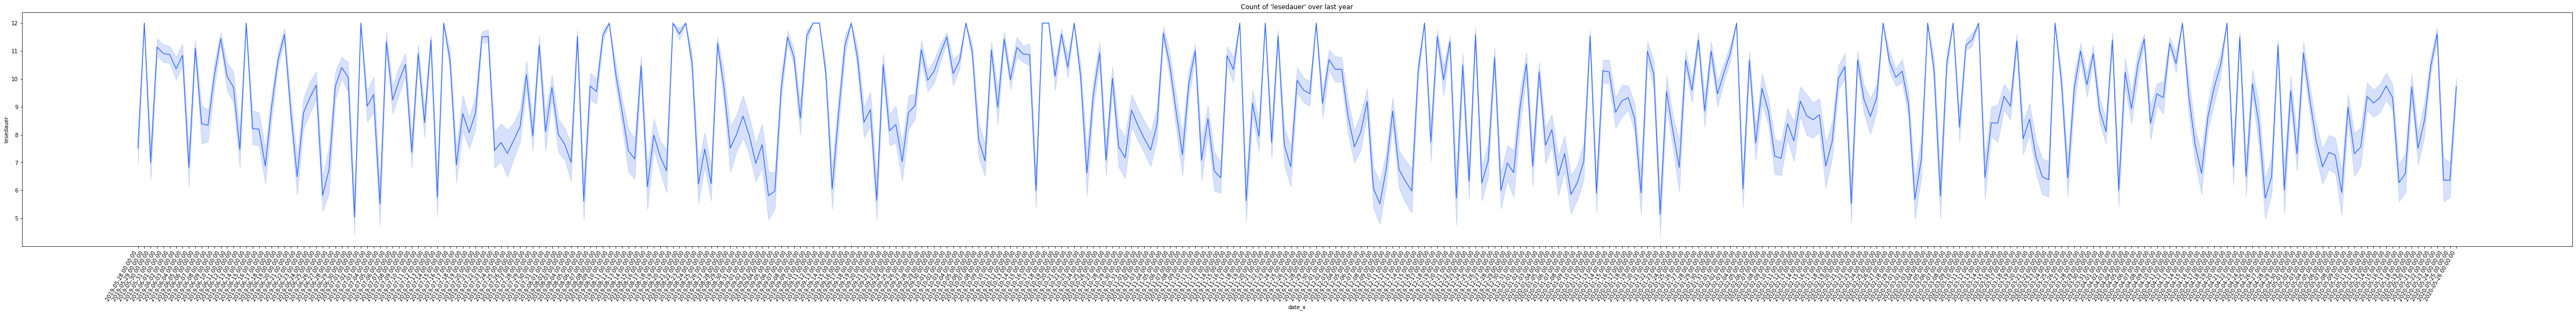

In [24]:
labels = sorted(list(set([i for i in df_timegap["date_x"]])))

plt.figure(figsize=(85,8))
plt.title("Count of 'lesedauer' over last year")
t = sns.lineplot(data=df_timegap, x="date_x", y="lesedauer")
t.set_xticklabels(labels, rotation=60, ha="right");

<ipython-input-25-941cddb75f69>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  t.set_xticklabels(labels, rotation=60, ha="right");


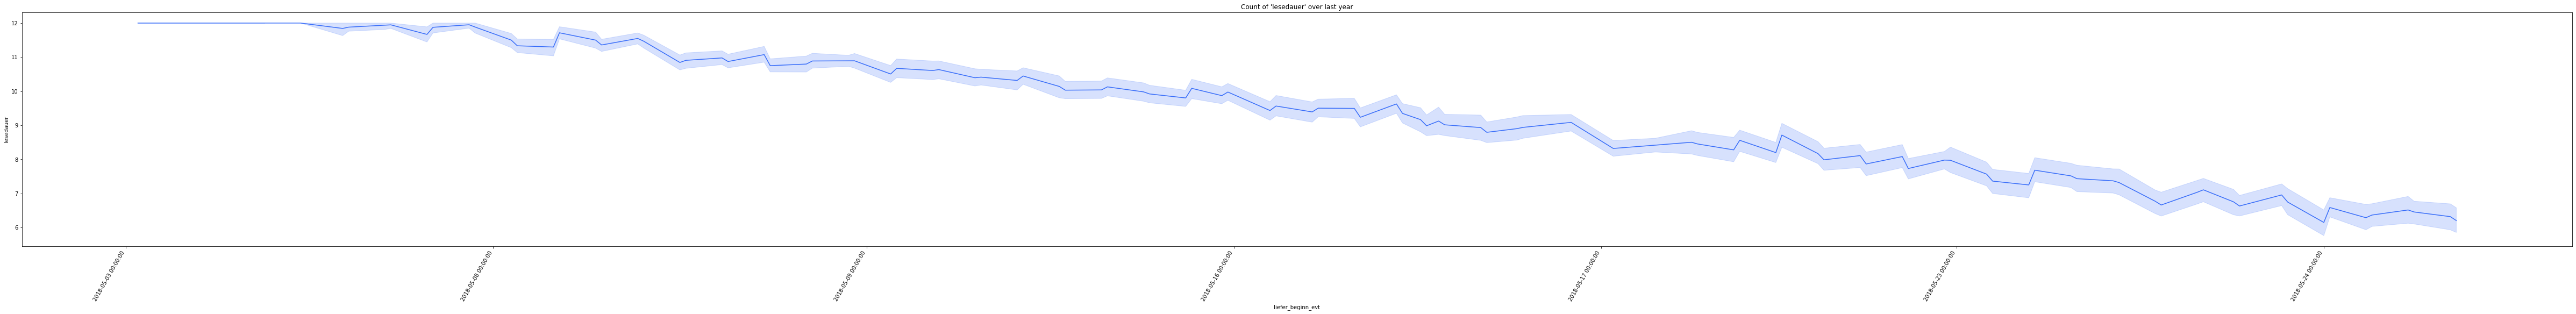

In [25]:
labels = sorted(list(set([i for i in df_timegap["liefer_beginn_evt"]])))

plt.figure(figsize=(85,8))
plt.title("Count of 'lesedauer' over last year")
t = sns.lineplot(data=df_timegap, x="liefer_beginn_evt", y="lesedauer")
t.set_xticklabels(labels, rotation=60, ha="right");

This graph should not have any variance. 
For people who did not quit their subscription yet, the lesedauer should decrease from 24 (months) to 0 
Randomly picking a end_date introduces variance to the lesedauer and makes this variable useless

### avg_churn over time

NameError: name 'df_churn' is not defined

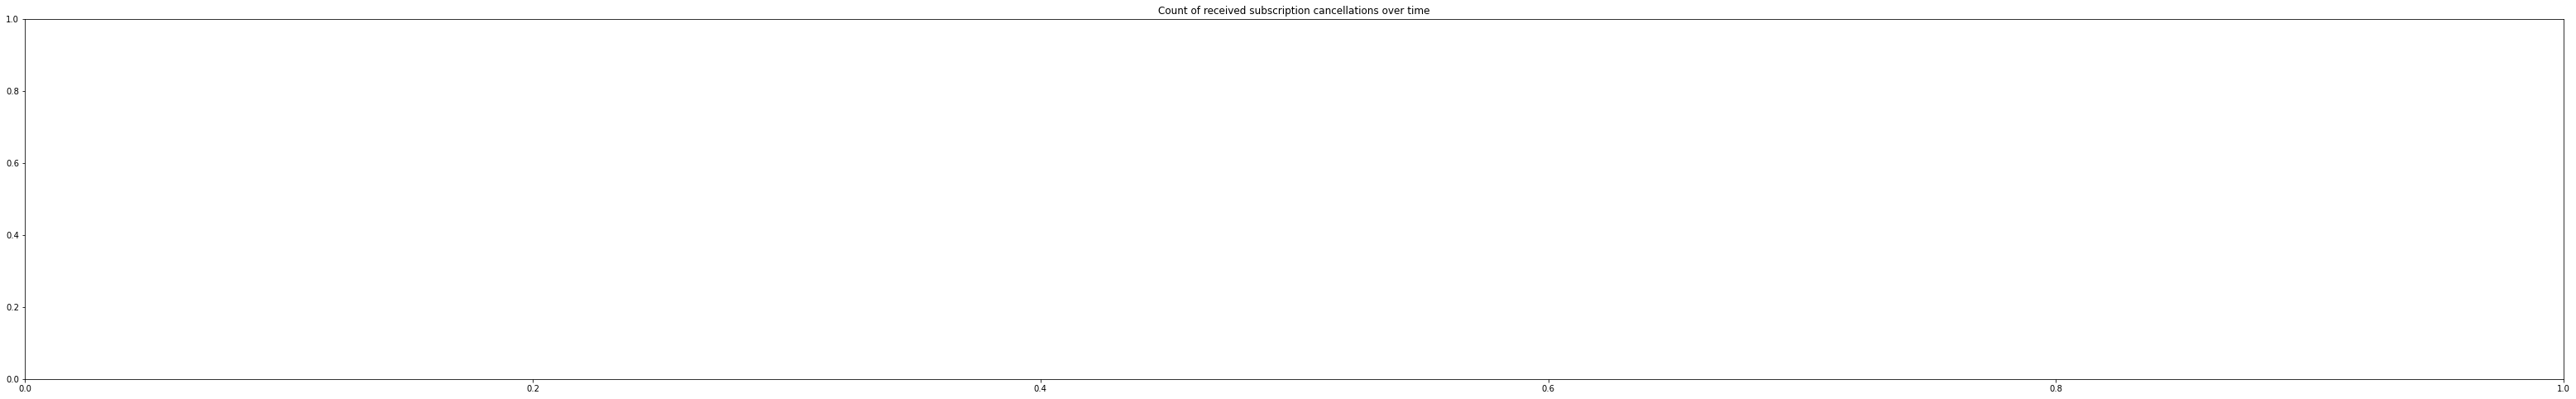

In [26]:
labels = sorted(list(set([i for i in df["kuendigungs_eingangs_datum"]])))

plt.figure(figsize=(55,8))
plt.title("Count of received subscription cancellations over time")
t = sns.lineplot(data=df_churn, x="kuendigungs_eingangs_datum", y="avg_churn")
t.set_xticklabels(labels, rotation=60, ha="right");